## Two-dimensional projectile motion with quadratic drag

In this notebook, I will be considering the numerical solution to the equations of motion concerning the 2D trajectory of a projectile moving through a medium that exerts a quadratic drag force on it. For such a situation, we can express Newton's laws of motion as: 

\begin{align*}
\mathbf{F} = m\ddot{\mathbf{x}} = m \dot{\mathbf{v}} = 
\begin{bmatrix}
-\beta v v_x \\
-mg -\beta v v_y
\end{bmatrix}
\end{align*}

where $v = v(v_x, v_y) = \sqrt{v_x^2+v_y^2}$, $\beta$ is the quadratic drag coefficient, $g$ is the gravitational constant, and $m$ is the mass of the system. This is a first order coupled differential equation, with $\dot{v}_x = f(v_x, v_y, t)$ and $\dot{v}_y = g(v_x, v_y, t)$.

To solve this, we can define the state function $\mathbf{f}$


\begin{align*}
\mathbf{f}(v_x, v_y, t) = 
\begin{bmatrix}
f(v_x, v_y, t) \\
g(v_x, v_y, t)
\end{bmatrix}
=
\begin{bmatrix}
-\frac{\beta}{m} \sqrt{v_x^2+v_y^2} v_x \\
-g -\frac{\beta}{m} \sqrt{v_x^2+v_y^2} v_y
\end{bmatrix}
\end{align*}

This function can then be fed into our scipy.integrate.ivp_solve function in order to solve for the velocity.

Finally, to get the position $\mathbf{x}(t)$, we can integrate our velocity:

\begin{align*}
\mathbf{x}(t) = \int_{t_0}^t \mathbf{v}(t') dt' \simeq 
\sum_{i = 1}^N \mathbf{v}_i \Delta t_i
\end{align*}

In the last step, we express the computed velocities as $\mathbf{v}_i = \begin{bmatrix} v_{xi} \\ v_yi \end{bmatrix}$ determined at each time-step $\Delta t_i$ from our Runge Kutta method. This integral can be computed using a cumulative trapezoidal or cumulative Simpsom algorithm from scipy.integrate.

In [18]:
import numpy as np
import sympy as sp
import scipy as sc
import matplotlib.pyplot as plt
import ipywidgets as wd
import matplotlib.animation as animation

In [4]:
def stateFunction(t, vstar, beta, g, m):
    vx, vy = vstar # unpack the state vector components
    vxDot = -(beta/m)*np.sqrt(vx**2 + vy**2)*vx #calculate derivative in x
    vyDot = -g - (beta/m)*np.sqrt(vx**2 + vy**2)*vy # calculate derivative in y 
    return [vxDot, vyDot] #return answer as list

def integrateVelocity(t, vel, r0):
    x0, y0 = r0 #unpack initial position
    vx, vy = vel #unpack velocity array

    #integrate the velocity wrt time to determine position
    xOfT = sc.integrate.cumulative_simpson(vx, x=t, initial=x0)
    yOfT = sc.integrate.cumulative_simpson(vy, x=t, initial=y0)

    return [xOfT, yOfT] #return answer as list

def solve(t, fun, q0, args):
    #args contains the coefficients for the state function 
    
    #qstar needs to be the function that determines the derivative (stateFunction above)
    t_span = (t[0], t[-1]) #define the range of time based on t array
    #numerically solve given initial conditions 
    sol = sc.integrate.solve_ivp(fun, t_span, q0,
                                 method='RK45', t_eval=t,
                                 args=args)
    
    solution = [t] #create a list for the solution
    #unpack the solution vector to return as a tuple
    for y in sol.y:
        solution.append(y)
    
    return solution

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


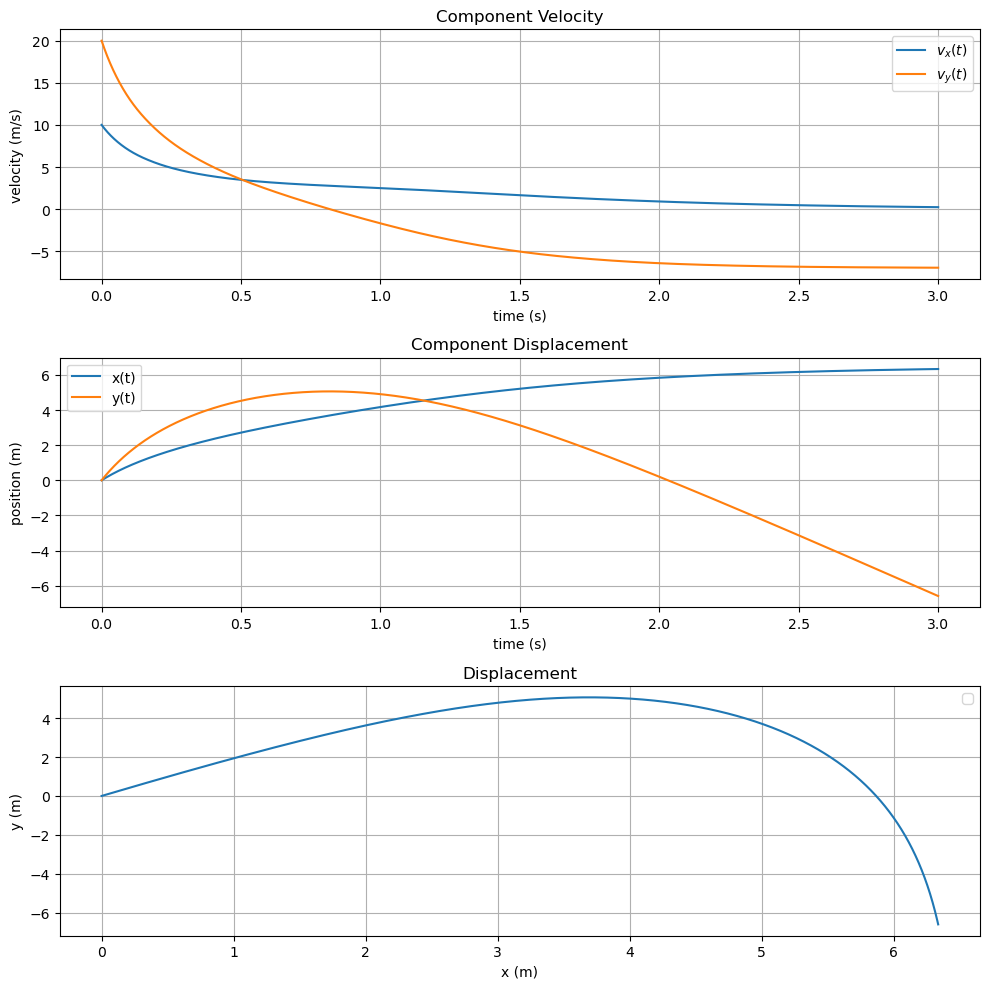

In [19]:
g = 9.8 #m/s2 define gravity
beta = 0.2 #Ns2/m4 order of magnitude given by Taylor book
m = 1 #mass of the system in kg

args = [beta, g, m] #coefficients for state function
v0 = [10, 100] #m/s, initial component velocity, vx,vy
r0 = [0, 0] # m, initial position x, y

N = 10000 #number of time steps
tStart = 0
tEnd = 3
v0 = [10, 20]
t = np.linspace(tStart, tEnd, N)

_, vx, vy  = solve(t, stateFunction, v0, args)
v = [vx, vy]

xoft, yoft = integrateVelocity(t, v, r0)

fig, ax = plt.subplots(3,1, figsize=(10, 10))

ax[0].plot(t, vx, label='$v_x(t)$')
ax[0].plot(t, vy, label='$v_y(t)$')

ax[0].set_title('Component Velocity')
ax[0].set_ylabel('velocity (m/s)')
ax[0].set_xlabel('time (s)')

ax[1].plot(t, xoft, label="x(t)")
ax[1].plot(t, yoft, label="y(t)")

ax[1].set_title('Component Displacement')
ax[1].set_ylabel('position (m)')
ax[1].set_xlabel('time (s)')

ax[2].plot(xoft, yoft)
ax[2].set_title('Displacement')
ax[2].set_ylabel('y (m)')
ax[2].set_xlabel('x (m)')

for a in ax:
    a.legend()
    a.grid()
plt.legend()
fig.tight_layout()

In [ ]:
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(autoscale_on=False, xlim=(tStart, tEnd)
                     ylim=(1.05*min(yoft), 1.05*max(yoft)))

ax.set_aspect('equal')

line, = ax.plot([], [], 'o')
trace, = ax.plot()

